# Investigation of Data collected from 100k plus medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This study aims at examining the dataset of patients' medical appointements to see if there are factors in the dataset with which we could predict if a patient will show up for their scheduled appointments. 

> The data was a collection of various information about individual patients including patient's ID, appointment ID, the patient's gender, scheduled and actual appointment days, the patient's age and neigborhood of residence, whether or not the patient has a 'scholarship' (beneficiary of the Brasilian welfare program Bolsa Familia), whether or not the patient suffers from any of hipertension, diabetes, or alcoholism. Also included in the data is the level of the patient's handicap if any (ranging from 0 to 4), whether or not the patient received an SMS message prior to the appointment, and perhaps most importantly the data includes information about whether or not the patient missed their appointment.

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Wrangling of the medical appointsments data

> The original source of the data is Kaggle and the data file was read directly from the link shown in the read_csv statement shown in the cell below.

### General Properties

In [3]:
# Loading the data 
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The dataframe has fourteen columns and 110,527 rows or entries per column with no missing data observed. The most useful columns already have the same data type (int64). The follwoing cells include a few lines of code aimed at mofidying the column labels to make them easier to read and comprehend.

In [4]:
# Showing first two lines of the dataframe.
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [5]:
#This was done to convert the column labels to all lower case letters for easier reference when needed
df.columns = df.columns.str.lower()
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [6]:
#Underscore included for two column labels ending in "id" for better comprehension
df.rename(columns =lambda x:x.strip().lower().replace("id","_id"), inplace = True)
df.head(2)

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [7]:
#Underscore also included for two column labels eding in "day" for better comprehension
df.rename(columns =lambda x:x.strip().lower().replace("day","_day"), inplace = True)
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [8]:
#The dash in "no-show" is changed to an underscore for label style uniformity
df.rename(columns =lambda x:x.strip().lower().replace("no-show","no_show"), inplace = True)
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
#This column label was mispelt as "handcap" and is changed to the right spelling as shown below.
df.rename(columns =lambda x:x.strip().lower().replace("handcap","handicap"), inplace = True)
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Data Cleaning: Dropping unwanted info from Dataframe

> From an examination of the data in each column of the dataframe, it was determined that a few of the columns will not be necessary for the level of analysis needed for this project. These columns, like patient_id, appointmen_id, scheduled_day, appointment_day, and neighborhood contain data which are either most likely independent of a patient's behavior, and/or contain data which may not yield any meaningful analysis results. 

> As a result of the above, it was decided that these columns should be eliminated from the dataframe. The analysis would then be done on some or all of the remaining column in relation to the no_show column to help determine potential factors affecting a patient's likelihood to miss an appointment. It was also observed that the age column included data for patients aged -1 and 0; the data for patients ages -1 and 0 were also dropped from the final dataframe used for this research. 

In [10]:
# A new dataframe df_new is created below from the original dataframe with this line of code.
# The new dataframe includes only those columns which were important for the analysis of this project data
df.drop(['patient_id', 'appointment_id','scheduled_day','appointment_day','neighbourhood'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   gender        110527 non-null  object
 1   age           110527 non-null  int64 
 2   scholarship   110527 non-null  int64 
 3   hipertension  110527 non-null  int64 
 4   diabetes      110527 non-null  int64 
 5   alcoholism    110527 non-null  int64 
 6   handicap      110527 non-null  int64 
 7   sms_received  110527 non-null  int64 
 8   no_show       110527 non-null  object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [11]:
# First two rows of new dataframe with only columns needed for analysis
df.head(2)

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No


In [12]:
# Examination of the age column
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [13]:
# A new dataframe "df_1" was created to include only ages greater than zero
# Data for patients ages -1 and 0 were dropped from the dataframe
df_1 = df[df.age > 0]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   gender        106987 non-null  object
 1   age           106987 non-null  int64 
 2   scholarship   106987 non-null  int64 
 3   hipertension  106987 non-null  int64 
 4   diabetes      106987 non-null  int64 
 5   alcoholism    106987 non-null  int64 
 6   handicap      106987 non-null  int64 
 7   sms_received  106987 non-null  int64 
 8   no_show       106987 non-null  object
dtypes: int64(7), object(2)
memory usage: 8.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis: Three research questions for analysis

In this section, I will be exploring the data to answer three questions:

> #### (1) Does the likelihood to miss an appointment depend on the gender of the patient

> #### (2) Does the age of a patient affect their likelihood to miss an appointment

> #### (3) Does the level of a patient's dissability have an effect on them missing an appointment

In [14]:
#further exploration of the age column
df_1['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [15]:
# Here I include a new column called "age_group" to the dataframe
# This new column would help categorize the ages of patients and also aid in the analysis of the second question
bin_edges = [1, 19, 38, 56, 115]
bin_names = ['young','old','older','oldest']
df_1['age_group'] = pd.cut(df_1['age'], bin_edges, labels = bin_names)
df_1.head()

/Users/menaekelemu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,0,1,0,0,0,0,No,oldest
1,M,56,0,0,0,0,0,0,No,older
2,F,62,0,0,0,0,0,0,No,oldest
3,F,8,0,0,0,0,0,0,No,young
4,F,56,0,1,1,0,0,0,No,older


> The dataframe above, "df_1" shows the first five rows of the final dataframe which will be used for the analysis in this project.Unwanted columns have been removed, and an extra column of age group was added to the dataframe.

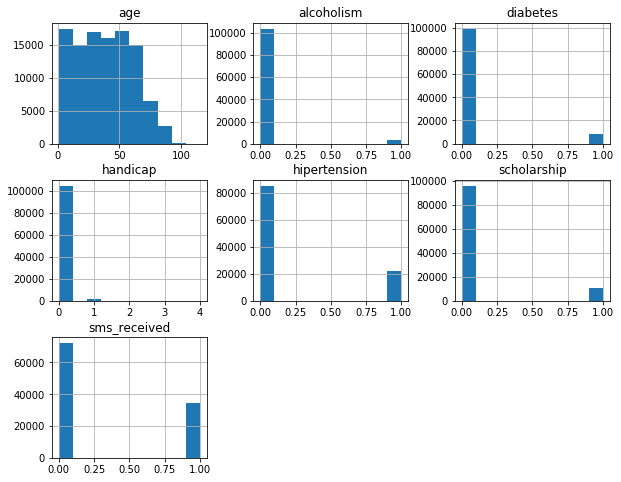

In [16]:
# Histogram plots of columns with quantitative values from the dataframe.
df_1.hist(figsize = (10, 8));

> The histograms above are of the columns with quantitative values only. The 'age' plot shows a slight right skew of the age distribution and shows that there are more people below the age of 60 yrs old in the population. The other columns all contain binary quantities and are composed of either a zero or a one. So the plots all show that fewer people from the population suffer from alcoholism, diabetes, and hipertension. We also see that a smaller proportion of the population have a handicap, receive shcolarship, and receive sms messages.

### Research Question #1:
> #### (Q1) Does the lieklihood to miss an appointment depend on gender?
> For this analysis I calculated the percentage of the population who missed their appointments just for comparison purposes. Then I simply separated the gender column of the main dataframe df_1 into two different dataframes, one for all the men and the other for all the women. From these two new dataframes, I then calculated the pecentage of those who missed their appointments. 

In [20]:
# The following is to help compute the percentage of all patients who did not show up for their appointments
# This creates a dataframe of all the patients missing appointments
no_shows = df_1.query('no_show == "Yes"')
# This computes the actual value of all the no shows by taking the length of the no_show column
total_no_shows = len(no_shows) 
# Finding total value of all the patients who showed plus those who missed their appointments
total_patients = len(df_1)
total_show = total_patients - total_no_shows
percent_no_show = round((total_no_shows/total_patients)*100,1)
print("The total number of all patients is: {}".format(total_patients))
print("The total number of patients who missed their appointment is: {}".format(total_no_shows))
print("The percentage of patients who missed their appointment is: {}%".format(percent_no_show))

The total number of all patients is: 106987
The total number of patients who missed their appointment is: 21680
The percentage of patients who missed their appointment is: 20.3%


In [23]:
# The following computes the percentage of men who did not show up for their appointments
men_no_shows = len(no_shows.query('gender == "M"'))
total_men = len(df_1.query('gender == "M"'))
p_men_no_show = round((men_no_shows/total_men)*100,1)
print("The total number of male patients is: {}".format(total_men))
print("The total number of men who missed their appointment is: {}".format(men_no_shows))
print("The percentage of male patients who missed their appointment is: {}%".format(p_men_no_show))

The total number of male patients is: 36869
The total number of men who missed their appointment is: 7405
The percentage of male patients who missed their appointment is: 20.1%


In [24]:
# The following computes the percentage of women who did not show up for their appointments
women_no_shows = len(no_shows.query('gender == "F"'))
total_women = len(df_1.query('gender == "F"'))
p_women_no_show = round((women_no_shows/total_women)*100,1)
women_no_shows, total_women, p_women_no_show
print("The total number of female patients is: {}".format(total_women))
print("The total number of women who missed their appointment is: {}".format(women_no_shows))
print("The percentage of women who missed their appointment is: {}%".format(p_women_no_show))

The total number of female patients is: 70118
The total number of women who missed their appointment is: 14275
The percentage of women who missed their appointment is: 20.4%


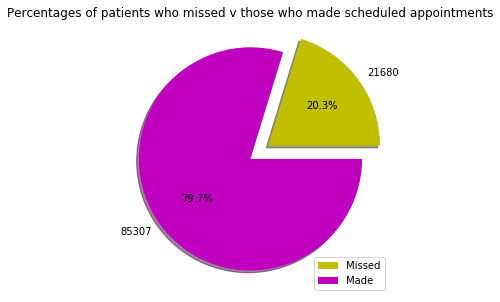

In [25]:
# Plot of a pie chart showing the total population 
values = [total_no_shows, total_show]
colors = ['y', 'm']
labels = ["Missed", "Made"]
explode = (0.2, 0)
plt.axis("equal")
plt.pie(values, colors = colors, labels = values, autopct='%1.1f%%', shadow = True, explode = explode)
plt.title("Percentages of patients who missed v those who made scheduled appointments")
plt.legend(labels, loc=4);
fig = plt.gcf()
fig.set_size_inches(5,5)

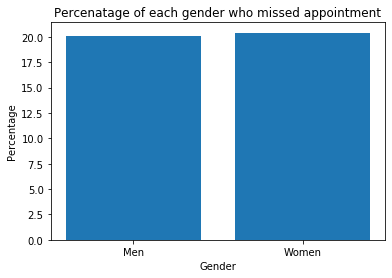

In [26]:
#Here I plot a bar graph comparing the perecntage of each gender who missed their apointment
plt.bar(["Men","Women"],[p_men_no_show, p_women_no_show])
plt.title("Percenatage of each gender who missed appointment")
plt.xlabel("Gender")
plt.ylabel("Percentage");

### Answer to Research Question #1:
> The results from the pie and bar charts above show that while about 20.3% (21,680) of all patients miss their appointments, while about 79.7% (85,307) make their appointments. The percent of all male patients who missed appointments was about 20.1%, while that of all female patients was about 20.4%. This means there may be no significant difference between men and women when it comes to the lieklihood of missing an appointment. A patient's gender may not be a good predicor of if the patient will show up for their scheduled appointment.

### Research Question #2:
> #### (Q2) Does age affect the likelihood that a patient will miss an appointment?
> This analysis is virtually the same as the gender analysis completed earlier. Except this time, I used the new column 'age_group' in creating four new dataframes using the four age_group categories: young (ages 1-19yrs), old (ages 19-38yrs), older (ages 38 56yrs), and the oldest age group (ages 56 - 115yrs). And from each dataframe, I calculated the percentage of each age group who missed their appointments.

In [29]:
# Computing the percentage of young people (ages 1 - 19) who missed their appointments
young_no_shows = len(no_shows.query('age_group == "young"'))
total_young = len(df_1.query('age_group == "young"'))
p_young_no_show = round((young_no_shows/total_young)*100,1)
print("The total number of all young patients is: {}".format(total_young))
print("The total number of young patients who missed their appointment is: {}".format(young_no_shows))
print("The percentage of young patients who missed their appointment is: {}%".format(p_young_no_show))

The total number of all young patients is: 24599
The total number of young patients who missed their appointment is: 5687
The percentage of young patients who missed their appointment is: 23.1%


In [30]:
#Here I compute the percentage old people (ages 19 - 38) who missed their appointments
old_no_shows = len(no_shows.query('age_group == "old"'))
total_old = len(df_1.query('age_group == "old"'))
p_old_no_show = round((old_no_shows/total_old)*100,1)
print("The total number of old patients is: {}".format(total_old))
print("The total number of old patients who missed their appointment is: {}".format(old_no_shows))
print("The percentage of old patients who missed their appointment is: {}%".format(p_old_no_show))

The total number of old patients is: 27334
The total number of old patients who missed their appointment is: 6340
The percentage of old patients who missed their appointment is: 23.2%


In [31]:
#This computes the percentage of older people (ages 38 - 56) who missed their appointments
older_no_shows = len(no_shows.query('age_group == "older"'))
total_older = len(df_1.query('age_group == "older"'))
p_older_no_show = round((older_no_shows/total_older)*100,1)
older_no_shows, total_older, p_older_no_show
print("The total number of older patients is: {}".format(total_older))
print("The total number of older patients who missed their appointment is: {}".format(older_no_shows))
print("The percentage of older patients who missed their appointment is: {}%".format(p_older_no_show))

The total number of older patients is: 26912
The total number of older patients who missed their appointment is: 5198
The percentage of older patients who missed their appointment is: 19.3%


In [32]:
#This cell computes the percentage of the oldest group of people (ages 56 - 115) who missed their appointments
oldest_no_shows = len(no_shows.query('age_group == "oldest"'))
total_oldest = len(df_1.query('age_group == "oldest"'))
p_oldest_no_show = round((oldest_no_shows/total_oldest)*100,1)
print("The total number of the oldest patients is: {}".format(total_oldest))
print("The total number of oldest patients who missed their appointment is: {}".format(oldest_no_shows))
print("The percentage of oldest patients who missed their appointment is: {}%".format(p_oldest_no_show))

The total number of the oldest patients is: 25869
The total number of oldest patients who missed their appointment is: 4040
The percentage of oldest patients who missed their appointment is: 15.6%


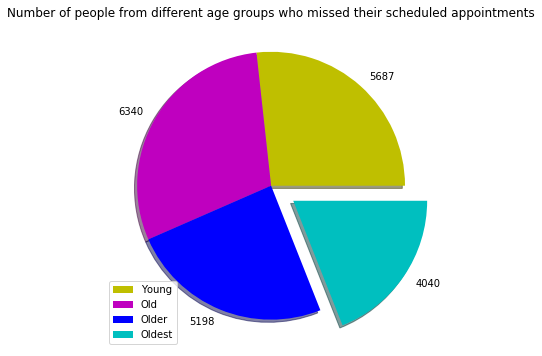

In [33]:
# Plot of a pie chart showing the total population of no shows by age group
values = [young_no_shows, old_no_shows, older_no_shows, oldest_no_shows ]
colors = ['y', 'm', 'b', 'c']
labels = ["Young", "Old","Older", "Oldest"]
explode = (0, 0, 0, 0.2)
plt.axis("equal")
plt.pie(values, colors = colors, labels = values, shadow = True, explode = explode)
plt.title("Number of people from different age groups who missed their scheduled appointments")
plt.legend(labels, loc=3);
fig = plt.gcf()
fig.set_size_inches(6, 6)

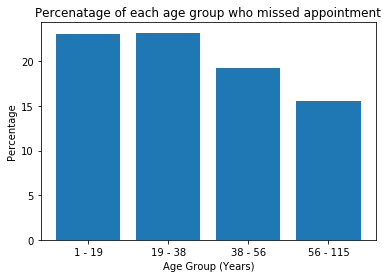

In [34]:
# Plot of a bar chart showing the respective percentage of each age group who missed appointments
locations = [1,2,3,4]
heights = [p_young_no_show, p_old_no_show, p_older_no_show, p_oldest_no_show]
labels = ["1 - 19","19 - 38","38 - 56","56 - 115"]
plt.bar(locations, heights, tick_label = labels)
plt.title("Percenatage of each age group who missed appointment")
plt.xlabel("Age Group (Years)")
plt.ylabel("Percentage");


### Answer to Research Question #2
> The pie chart above shows that of all those who missed their appointments, 5,687 of them were young or between ages of 1 and 19yrs old, 6,340 of them were old or between the ages of 19 and 38yrs old, 5,198 of them are in the older age group or between the ages of 38 and 56yrs old, while 4,040 of them are in the oldest age group or between the ages of 56 to 115yrs old.

> From the bar chart, we see that age may affect a patient's likelihood to miss an appointment. The percentage of the young people (ages 1-19yrs) and old people (ages 19 - 38yrs) who missed their appointments were very close at 23.1% and 23.2%. The analysis of the older age group (ages 38-56yrs) showed about 19.3% of them missed appointments, while the lowest percentage of those missing appointments was in the oldest age group (ages 56 -115yrs) with only 15.6% of them missing appointments. So a patient's age may be a good predictor of if the patient will show up for their appointment.

### Research Question #3:
> #### (Q3) Does level of handicap have an effect on whether or not a patient misses their appointment?
> In doing this analysis, I observed that there are five unique handicap levels in the data: 0, 1, 2, 3 and 4. I also assumed that handicap level of 0 represent everyone in the data with no handicap. Based on that assumption, I decided to exclude this group of people with a recorded handicap level of 0 from the study of the effect of handicap on likelihood to miss an appointment. The analysis was then conducted similarly to the gender and age analysis.

In [35]:
# This cell helps compute the total population of people with at least a handicap level of 1
# Result of cell computation also shows the percentage of the population who have a handicap level of at least 1
no_handicap = len(df_1.query('handicap == "0"'))
pop_total = total_men + total_women
total_handicap = pop_total - no_handicap
p_total_handicap = round((total_handicap/pop_total)*100,1)
print("The total number of non-handicap patients is: {}".format(no_handicap))
print("The total number of handicap patients is: {}".format(total_handicap))
print("The percentage of handicap patients is: {}%".format(p_total_handicap))

The total number of non-handicap patients is: 104747
The total number of handicap patients is: 2240
The percentage of handicap patients is: 2.1%


In [36]:
# This cell shows the percentage of those with handicap level 1 who missed their appointments
handicap_1_no_shows = len(no_shows.query('handicap == "1"'))
total_handicap_1= len(df_1.query('handicap == "1"'))
p_hand_1_no_show = round((handicap_1_no_shows/total_handicap_1)*100, 1)
print("The total number of patients with handicap of 1 is: {}".format(total_handicap_1))
print("The total number of patients with handicap 1 who missed their appointment is: {}".format(handicap_1_no_shows))
print("The percentage of handicap 1 patients who missed their appointment is: {}%".format(p_hand_1_no_show))

The total number of patients with handicap of 1 is: 2041
The total number of patients with handicap 1 who missed their appointment is: 366
The percentage of handicap 1 patients who missed their appointment is: 17.9%


In [38]:
# This cell computes the percentage of people with handicap level 2 who missed their appointments
handicap_2_no_shows = len(no_shows.query('handicap == "2"'))
total_handicap_2= len(df_1.query('handicap == "2"'))
p_hand_2_no_show = round((handicap_2_no_shows/total_handicap_2)*100, 1)
print("The total number of patients with handicap of 2 is: {}".format(total_handicap_2))
print("The total number of patients with handicap 2 who missed their appointment is: {}".format(handicap_2_no_shows))
print("The percentage of handicap 2 patients who missed their appointment is: {}%".format(p_hand_2_no_show))

The total number of patients with handicap of 2 is: 183
The total number of patients with handicap 2 who missed their appointment is: 37
The percentage of handicap 2 patients who missed their appointment is: 20.2%


In [40]:
# Here I compute the percentage of people with handicap level 3 who missed their appointments
handicap_3_no_shows = len(no_shows.query('handicap == "3"'))
total_handicap_3= len(df_1.query('handicap == "3"'))
p_hand_3_no_show = round((handicap_3_no_shows/total_handicap_3)*100, 1)
print("The total number of patients with handicap of 3 is: {}".format(total_handicap_3))
print("The total number of patients with handicap 3 who missed their appointment is: {}".format(handicap_3_no_shows))
print("The percentage of handicap 3 patients who missed their appointment is: {}%".format(p_hand_3_no_show))

The total number of patients with handicap of 3 is: 13
The total number of patients with handicap 3 who missed their appointment is: 3
The percentage of handicap 3 patients who missed their appointment is: 23.1%


In [41]:
# This cell shows the percentage of people with handicap level 4 who missed their appointments
handicap_4_no_shows = len(no_shows.query('handicap == "4"'))
total_handicap_4= len(df_1.query('handicap == "4"'))
p_hand_4_no_show = round((handicap_4_no_shows/total_handicap_4)*100, 1)
handicap_4_no_shows, total_handicap_4, p_hand_4_no_show
print("The total number of patients with handicap of 4 is: {}".format(total_handicap_4))
print("The total number of patients with handicap 4 who missed their appointment is: {}".format(handicap_4_no_shows))
print("The percentage of handicap 4 patients who missed their appointment is: {}%".format(p_hand_4_no_show))

The total number of patients with handicap of 4 is: 3
The total number of patients with handicap 4 who missed their appointment is: 1
The percentage of handicap 4 patients who missed their appointment is: 33.3%


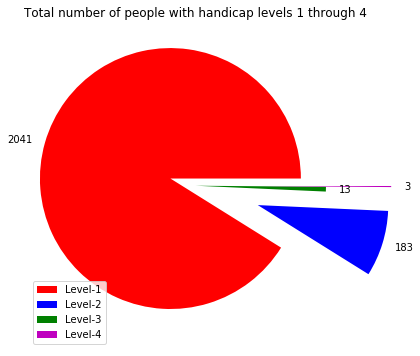

In [42]:
# Plot of a pie chart showing the total number of people with handicap levels 1 to 4
values = [total_handicap_1, total_handicap_2, total_handicap_3, total_handicap_4 ]
colors = ['r', 'b', 'g', 'm']
labels = ["Level-1", "Level-2","Level-3", "Level-4"]
explode = (0.2, 0.5, 0, 0.5)
plt.axis("equal")
plt.pie(values, colors = colors, labels = values, explode = explode)
plt.title("Total number of people with handicap levels 1 through 4")
plt.legend(labels, loc=3);
fig = plt.gcf()
fig.set_size_inches(6, 6)

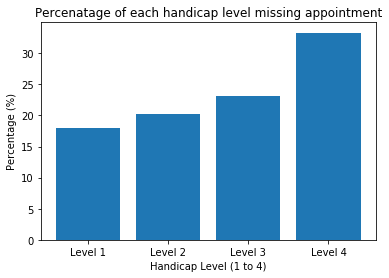

In [43]:
# Plot of a bar chart showing the respective percentage of people in each handicap level who missed appointments
locations = [1,2,3,4]
heights = [p_hand_1_no_show, p_hand_2_no_show, p_hand_3_no_show, p_hand_4_no_show]
labels = ["Level 1","Level 2","Level 3", "Level 4"]
plt.bar(locations, heights, tick_label = labels)
plt.title("Percenatage of each handicap level missing appointment")
plt.xlabel("Handicap Level (1 to 4)")
plt.ylabel("Percentage (%)");

### Answer to Research Question #3:
> The pie chart above shows the number of people with at least 1 handicap. We see that there is 2,041 people with exaclt handicap level 1, 183 people have handicap level 2, 13 people have handicap level 3, and only three people have hadicap level 4. The small size of this handicap sample presents some limitations to how much we should rely on the result of this research question.

> As shown on bar chart, there appears to be some effect on the likelihood to miss an appointment as a patient's handicap level increases. The numbers show a steady increase from about 18% of patients with handicap level 1 missing their appointments to about 33% of patients with handicap level 4 missing their appointments. Although I should add that the perventage of handicap level 1 and level 2 patients who missed their appointments fall below or at the percentage of the general population who missed appointments. 

> The sample size for this study may also not be big enough to answer the resarch question conclusively; the total handicap sample population availble is abot 2240, which is about 2% of the total population of 106,087 patients used for the final data analysis. The sample size of patients with a handicap level of 4 was alos severely small with only three people. So handicap level may be a good precitor of if a patient will show up for their scheduled appointment

<a id='conclusions'></a>
## Conclusions and Limitations

> The goal of this study was to examine the data to determine if there may be certain individual factors with which we may be able to predict a patient's behavior with regards to whether or not they will show up for their scheduled medical appointment. Three questions were examined:

> #### (1) Does the likelihood to miss an appointment depend on the gender of the patient?
The result from the data showed that women and men have virtualy equal percentages of people who missed their appointment. Both male and female populations had about 20% of people missing appointments. So it is likely that a patient's gender has no bearing on their likelihood to miss an appointment. Gender may not be a good predictor of if a patient will show up for a scheduled medical appointment.
>> #### Limitations-1: 
>> While the sample size used for the analysis for research question #1 seem to be big enough, it is still impossible to make definitive conclusions regarding the result. The data collected did not have other information with which we could make better comparisons of male versus female behavior. Other factors which may lead to different results are marital status, number of children, family size, employment status and/or hours worked per week. With these extra information, we could then for instance compare single men with no kids and who work 40hrs a week to single women with similar factors. Comparing a 40yr old single mother with three kids who work 50hrs a week to a single man living alone and only working 40hrs a week is probably not an ideal way to conduct a study that would yield meaningful results.

> #### (2) Does the age of a patient affect their likelihood to miss an appointment?
The result here showed that there may be a relationship between a patient's age and their likelihood to miss an appointment. The study showed the oldest group of patients were least likely to miss an appointment when compared to the younger population of all those missing appointments. About 15.6% of the oldest people (ages 56 - 115) missed their appointment. About 23% of people (young and old between ages 1 and 38) missed their appointments, while about 19% of the older population (ages 38 - 56yrs) missed their appointments. Age may be a good predictor of if a patient will show up for a scheduled medical appointment.
>> ##### Limitations-2:
>> The challenge with the age study especially for the young age group bewteen the ages of 1 and 19yrs old is the inability to correct for independence. We know most kids and teenagers in this age group will most likely depend on their parent(s) or caregivers to bring them to their medical appointments. So the likelihood for a child or individual in this age group to miss an appointment may actually depend more on their parent(s), guardian or caregiver than on their age. The same applies to the oldest population; chances are a 115yr old patient is not driving themself to a medical appointment. Having more information about the patient such as whether or not they came to appointment themsleves as well as some other information about whoever brought them in, or was expected to bring them in for the appointment would help standardize the data and yield more meaningful results. Other data like number of siblings in household, gender, age and employment status of parent or caregiver would also help.

> #### (3) Does the level of a patient's dissability have an effect on them missing an appointment?
Although the result from this study appeared to show that more disabled people (33.3%) miss their appointments than the average for the general population (approx. 20%), due to the sample size available for this study, no final conclusions should be made about the effects of dissability on a patient's likelihood to miss an appoitnment. About 18% of people with handicap level 1, 20% of people with handicap level 2, and 23% of people with handicap level 3 missed their appointments. It is possible that handicap level may be a good predictor of if a patient will show up for a scheduled medical appointment.
>> ##### Limitations-3:
>> By far the biggest limitaion with this study as already mentioned in earlier cells is the very small number of the sample. there were exactly 3 people with the highest hadicap level possible and one of them or 33.3% missed their appointment. We have no way of knowing if this 33.3% miss rate would translate to a larger sample size of people with a handicap level of 4. For handicap level 3, there was only 13 people of which 3 missed their scheduled appointments. Again, it is hard to say conclusively that this miss rate of 23.1% will translate to a bigger sample size of say 1,300 patients. In addition, if a handicap person has to depend on others to bring them to a medical appointment, then the likelihood that they would miss a scheduled appointment may actually depend more on characteristics of their  caregivers and not solely on the fact that they are handicap. 

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0